In [1]:
import pandas as pd # yapısal veri setleri ile çaışmak için uygundur
import random as rd 
import matplotlib.pyplot as plt # veri göreslleştirme, pyplot matlab benzeri bir arayüz sunar
import seaborn as sns # istatistiksel veri görselleştirme
import plotly.express as px

In [2]:
icu = pd.read_csv("ICUData.csv")
icu

,ID,sex,age,surgery,heart rate,temperature,bilirubin,SAPS II,liver failure,LOS,outcome
0,1,female,76,other,98.0,36.5,6.512142,57,0,1,died
1,2,female,60,gastrointestinal,80.0,38.1,14.523197,52,0,2,home
2,3,male,66,cardiothoracic,99.6,37.4,22.972480,57,0,1,secondary care/rehab
3,4,male,74,other,110.0,39.1,19.299346,45,0,2,home
4,5,female,68,other,94.1,38.5,39.076485,49,0,1,home
...,...,...,...,...,...,...,...,...,...,...,...
495,496,male,62,cardiothoracic,118.0,37.3,13.234537,33,0,1,secondary care/rehab
496,497,male,67,cardiothoracic,115.0,38.0,10.740772,56,0,1,died
497,498,female,53,cardiothoracic,131.0,37.9,14.131188,38,0,3,secondary care/rehab
498,499,male,68,other,86.9,36.0,9.596478,66,0,2,home


In [3]:
from statistics import mean # mean i alır
import numpy as np # bilimsel hesaplamalar ve sayısal işlmeler için kullanılır
mean(np.log(icu.bilirubin)) # logirtmasını alır ve ortalamsını verir

2.847326253810784

In [4]:
np.exp(mean(np.log(icu.bilirubin))) #exp e  tabanlı üstel hesaplama yapar
# logaritmanın ortalamasının üstel değeri hesaplanır

np.float64(17.24162043918728)

In [5]:
from scipy.stats import gmean # üstteki kodun kütüphane kullanılarak yapılanı
gmean(icu.bilirubin)

np.float64(17.241620439187272)

In [7]:
from statsmodels import robust
robust.mad(icu.temperature) # mad medyan mutlak sapma
#veri nokatalarının medyana olna uzaklıklarının medyanıdır
# yayılımı ölçmek için kullanılır, 1 den fazla yayılım fazladır

np.float64(1.1860817748044774)

In [9]:
house = pd.read_csv("resources/housing.csv")
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
print(f"Ortalama = {house.total_bedrooms.mean()}")

Ortalama = 537.8705525375618


In [13]:
print(f"Medyan = {house.total_bedrooms.median()}")
# ortalama medyana yakın olmadığı için çarpık veridir 

Medyan = 435.0


<Axes: xlabel='total_bedrooms', ylabel='Count'>

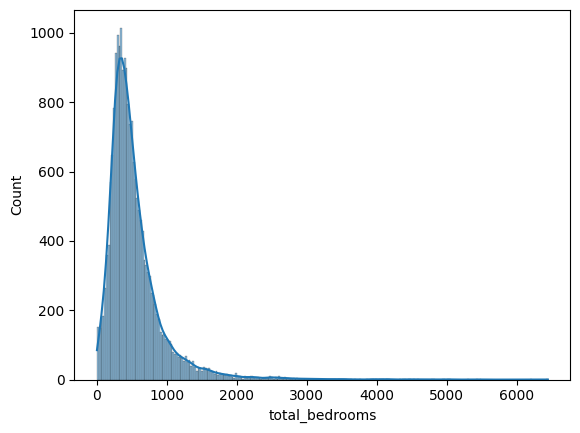

In [14]:
import seaborn as sns
sns.histplot(house.total_bedrooms, kde= True)

In [15]:
house.dropna(inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [17]:
# çarpıklık katsayısı bulma
from scipy.stats import skew
skew (house.total_bedrooms) #çarpıklık mevcut

np.float64(3.45929235876747)

In [18]:
# Modellemede giriş çıkış verileri belirlenmeli input (X) bağımsız değişken, output (y) bağımlı değişken
# Toplam satış kar enflasyon toplam çalışan toplam şthalat bu verileri kullanarak bir tane model oluştur, önce giriş çıkış belirle
# Toplam satış toplam ithalat ve toplam çalışana göre karı hesaplayabiliriz girişler ve çıkış
# Median_house_value = y diğerleri= x  y tahmin edilen y ile x arasındane kadar bir orantı var corelasyon bunu verir

In [20]:
house.drop("ocean_proximity", axis=1).corr()
# sözel olan kısımı çıkardık

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<Axes: >

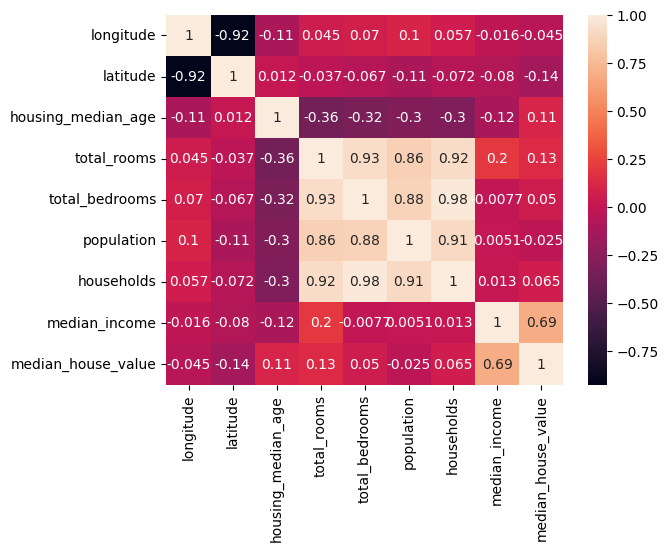

In [25]:
# ısı grafikleri corelasyona baktık ısı yüksek olan x ile en fazla orantı içerendir
sns.heatmap(house.drop("ocean_proximity", axis=1).corr(), annot=True)
# annot kutulara veri ekledi

In [27]:
pd.get_dummies(house.ocean_proximity)
# okyanusa yakınlık bir x değeridir, bu verilerin aldığı her bir değer için bir sütun oluştu

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [30]:
X = house.drop(columns='ocean_proximity')
X=X.join(pd.get_dummies(house.ocean_proximity, dtype=int))
X


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [34]:
# Train = model oluştutur, Test = modelin başarısı ölçülür

In [1]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

NameError: name 'X' is not defined